# Complexité d'un algorithme

Déterminer la complexité d’un algorithme, c’est évaluer
* la quantité de mémoire requise : **complexité spatiale**,
* le temps de calcul à prévoir : **complexité temporelle**.

Ces deux notions dépendent de nombreux paramètres matériels qui sortent du domaine de l’algorithmique. Mais il est souvent possible d'évaluer l'ordre de grandeur de ces deux quantités. Cela permet de déterminer **l'efficacité d'un algorithme**. Un algorithme inefficace peut augmenter les temps de calcul de quelques millisecondes à plusieurs années. Dans un premier temps nous allons nous interésser à la compléxité temporelle.

## Pourquoi et comment évaluer le temps de calcul à prévoir ?



### Exemple 1 : pourquoi ? 

Problème : Construire une ville de 14 maisons et 1 pizzéria, pour éviter aux livreurs de pizzas de parcourir trop de distance lors des livraisons. On suppose qu'il faut une unité de temps pour passer d'une maison à une autre. Les routes possibles pour les livreurs sont représentées avec des traits noirs.

* Disposition 1 : linéaire
* Disposition 2 : arborescente

Pour ces deux dispositions quel est le pire cas pour une commande à livrer quand la pizzeria est en position 1 ? 

![](images/pizzasIcone.png)

Même question avec 1023, 16777215 et $n$ maisons

In [1]:
from numpy import log10, arange, trunc
import matplotlib.pyplot as plt

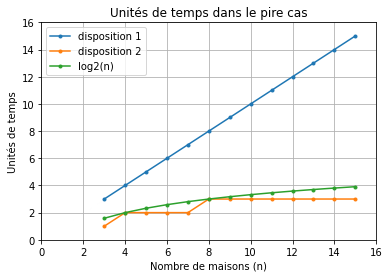

In [3]:
x_max = 16
rep = ".-"
x = arange(3, x_max)
dispo1 = x
dispo2 = trunc(log10(x)/log10(2))
log_2 = log10(x)/log10(2)
plt.xlim(0, x_max)
plt.ylim(0, x_max)
plt.plot(x, dispo1, rep,label="disposition 1")
plt.plot(x, dispo2, rep,label="disposition 2")
plt.plot(x, log_2, rep,label="log2(n)")
plt.xlabel("Nombre de maisons (n)")
plt.ylabel("Unités de temps")
plt.title("Unités de temps dans le pire cas")
plt.legend()
plt.grid()
plt.show()

## Exemple 2 : comment ? 

**Réallocation de tableau en temps constant amortis** 

Problème : Soit un tableau quelconque (non trié) dans lequel on veut ajouter de nouveaux éléments. À l'ajout d'un élément, ou bien le tableau admet encore au moins une case vide ou bien il est totalement rempli. 
* Dans le premier cas l'adjonction du nouvel élément consiste en une opération élémentaire d'insertion en fin de tableau avec une complexité en $O(1)$. 
* Dans le second cas (qui sera considéré comme un cas rare), 
    * il faut d'abord créer un nouveau tableau dont la taille est supérieure à celle du tableau précédent, 
    * puis recopier les éléments de l'ancien tableau, 
    * puis insérer l'élément à ajouter. 

Comment étendre la taille d'un tableau pour garantir que le coût de l'insertion dans un tableau plein reste globalement marginal, conduisant à un coût en $O(1)$ pour ce que l'on appelera **la moyenne amortie**. *Les algorithmes de complexité constante amortie sont constants *vus de loin* mais peuvent être plus lents que prévus de manière occasionnelle.*

Pour cela nous allons étudier deux stratégies.
* Stratégie 1 : Le tableau ne contient rien et on ajoute les éléments par blocs de taille fixe à la fin du tableau. On pourra commencer avec des blocs de 1 élément puis généraliser à des blocs de b éléments.
* Stratégie 2 : Même principe mais on double la taille des blocs à chaque fois.

Pour ces deux stratégies quel est le nombre d'écritures nécessaires ? Le nombre d'écritures correspond à l'ensemble des opérations nécessaires pour la copie et le stockage des éléments. C'est un bon bon indicateur de la complexité temporelle si l'on considère qu'une écriture se fait en temps constant. 

#### Réallocation par ajout d’une case
Avec cette stratégie il est nécessaire d'allouer un nouveau tableau et d'en recopier tous les éléments à chaque insertion. Le nombre d'écritures (noté $i\in\mathbb{N}$) est égal à:
$$\sum_{i=1}^{n}i = \dfrac{n(n+1)}{2}\approx \dfrac{n^2}{2}$$

#### Réallocation par ajout d'un bloc de taille fixe $b$
Pour simplifier les notations nous faisons l'hypothèse que le nombre d'éléments $n$ à ajouter est un multiple de $b$ c'est à dire que $n = kb$. Dans ce cas le nombre d'écritures est égal à:
$$\sum_{i=1}^{k}bi = b\dfrac{k(k+1)}{2} \approx \dfrac{n^2}{2b}$$

#### Réallocation par ajout d'un bloc dont la taille double à chaque fois
Pour simplifier les notations nous faisons l'hypothèse que le nombre d'éléments $n$ à ajouter est une puissance de deux c'est à dire que $n=2^k$ avec $k$ le nombre d'étapes à réaliser. Dans ce cas le nombre d'écritures est égal à:
$$\sum_{i=0}^{k}2^k = \dfrac{1-2^{k+1}}{1-2} = 2^{k+1}-1 \approx 2n$$

#### En conclusion

Dans un tableau de taille n, l'ajout d'un élément à une complexité en temps dans le pire cas de :
* $O(n^2)$ pour des réallocations avec des blocs de taille fixe.
* $O(n)$ lorsque que l'on double la taille des blocs à chaque réallocation. 

**Remarque :** Est-on sûr que doubler la taille des blocs à chaque réallocation soit la meilleur stratégie ?

https://github.com/python/cpython/blob/main/Objects/listobject.c

### Temps d'exécution

Un processeur actuel (2021) dont la vitesse d'horloge est de 3,2 GHz exécute 3,2 milliards de cycles par seconde. Parfois, plusieurs instructions sont exécutées en un seul cycle d'horloge ; dans d'autres cas, une seule instruction peut être traitée sur plusieurs cycles d'horloge. Attention toutefois comme les différentes conceptions de CPU traitent les instructions différemment, il est préférable de comparer les vitesses d'horloge au sein d'une même marque de CPU et d'une même génération.

Pour simplifier les calculs, soit un processeur exécutant une instruction élémentaire en $10^{-9}$ s.</br>
Soit un algorithme qui prend en entrée un jeu de données de $n = 10^6$ éléments.

L'exécution pour cet algorithme de  : 
* $n$ instructions élémentaires nécessitent  $10^{-3}\ s$
* $n^2$ instructions élémentaires nécessitent  $10^{3}\ s= 16\ min\ 40\ s$
* $\log_2(n)$ instructions élémentaires nécessitent  $\approx 2\times10^{-8}\ s = 20\ ns$
* $n\times\log_2(n)$ instructions élémentaires nécessitent  $\approx 0.02\ s$

### Complexité temporelle

En algorithmique, la complexité en temps est une mesure du temps utilisé par un algorithme, exprimé comme fonction de la taille de l'entrée. La notion d'entrée est à percevoir comme une donnée dont on ne connait pas la taille à l'avance et qui dépend du choix de l'utilisateur. Pour s'affranchir des environnements matériel et logiciel, évaluer le temps d'exécution consiste à compter le nombre d'instructions élémentaires avant d'arriver à un résultat. On se contente souvent de  donner une borne supérieure ou inférieure sur le nombre d'instructions élémentaires, exprimée par un ordre de grandeur qui est indépendant de l'implémentation de l'algorithme et du langage de programmation.

On définit trois complexité différentes:
* La complexité dans le **pire** des cas -> borne supérieure
* La complexité dans le **meilleur** des cas -> borne inférieure
* La complexité en **moyenne**

#### Les instructions élémentaires

La première étape consiste donc à préciser quelles sont les instructions élémentaires, c’est-à-dire celle qui
seront considérées comme ayant un coût constant, indépendant de leurs paramètres. Parmi celles-ci figurent en
général :
* les opérations arithmétiques (addition, soustraction, multiplication, division, ...)
* la comparaisons de données (relation d’égalité, d’infériorité, ...)
* les transferts de données (lecture et écriture dans un emplacement mémoire)
* les instructions de contrôle (branchement conditionnel et inconditionnel, appel à une fonction auxiliaire, ...)

#### La taille de l'entrée

Il maintenant nécessaire de définir ce que l'on appelle la taille de l'entrée. Il peut s'agir : 
* du nombre d'éléments des paramètres de l'algorithme comme le nombre d'éléments d'un tableau
* d'un ou plusieurs entiers sur lesquels on va itérer 
* autres ???

#### Notations mathématiques

Il reste à évaluer en fonction de la taille de l'entrée le nombre $f(n)$ d’opérations élémentaires requises par l’algorithme. Mais comme il est difficile et fastidieux d'en déterminer le nombre exact, on se contentera le plus souvent d’en donner l’ordre de grandeur à l’aide des notations de Landau. Cette notation permet de décrire le comportement asymptotique des fonctions. Intuitivement, elle indique avec quelle rapidité une fonction *augmente* ou *diminue*.

* **Limite asymptotique supérieure :** Soient $f : \mathbb{N} \rightarrow \mathbb{R}$ et $g : \mathbb{N} \rightarrow \mathbb{R}$. On dit que $f(n)=O(g(n))$ si et seulement si:

$$\exists c \in \mathbb{R}^{+*}, \exists n_0 \in \mathbb{N}^*\,|\,f(n) \leqslant c*g(n), \forall n > n_0$$

Cette notation indique que dans le pire des cas, la croissance de $f(n)$ ne dépassera pas celle de $g(n)$.
L’usage de cette notation exprime l’objectif qu’on se donne le plus souvent : **déterminer le temps d’exécution
dans le cas le plus défavorable.**

* **Limite asymptotique inférieure :** Soient $f : \mathbb{N} \rightarrow \mathbb{R}$ et $g : \mathbb{N} \rightarrow \mathbb{R}$. On dit que $f(n)=\Omega(g(n))$ si et seulement si:

$$\exists c \in \mathbb{R}^{+*}, \exists n_0 \in \mathbb{N}^*\,|\,f(n) \geqslant c*g(n), \forall n > n_0$$

Enfin, lorsque le pire et le meilleur des cas ont même ordre de grandeur, on utilise la notation $\Theta$

* **Limite asymptotique $\Theta$ :** Soient $f : \mathbb{N} \rightarrow \mathbb{R}$ et $g : \mathbb{N} \rightarrow \mathbb{R}$. On dit que $f(n)=\Theta(g(n))$ si et seulement si:

$$\exists c_1 \in \mathbb{R}^{+*}, \exists c_2 \in \mathbb{R}^{+*}, \exists n_0 \in \mathbb{N}^*\,|\, c_1*g(n) \leqslant f(n) \leqslant c_2*g(n), \forall n > n_0$$

### Ordre de grandeur et temps d'exécution

En considérant que l'on réalise $10^9$ opérations à la seconde, le tableau ci-dessous donne un ordre de grandeur du temps nécessaire à l’exécution d’un algorithme en fonction de sa complexité et de la taille des entrées. Ce tableau montre clairement que les algorithmes ayant une complexité supérieure à une complexité quadratique $O(n^2)$ soient en général considérées comme inutilisables en pratique (sauf pour de petites
voire très petites valeurs de n).

$$\begin{array}{|l|l|l|l|l|l|l|}\hline
&\log(n) & n\log(n) & n & n^2 & n^3 & 2^n \\\hline
10^2 & 7 ns  & 100 ns    & 0.7 \mu s & 10 \mu s      & 1 ms & 4\times 10^{13} \text{ années}\\\hline
10^3 & 10 ns & 1 \mu s   & 10 \mu s  & 1 ms          & 1s   & 10^{292} \text{ années}\\\hline
10^4 & 13 ns & 10 \mu s  & 133 \mu s & 100 ms        & 17 s & \\\hline
10^5 & 17 ns & 100 \mu s & 2 ms      & 10 s          & 11, 6 \text{ jours} & \\\hline
10^6 & 20 ns & 1 ms      & 20 ms     & 17 \text{ mn} & 32 \text{ années}& \\\hline
\end{array}$$

Qualifications usuelles des complexités.

$$\begin{array}{|l|l|}\hline
O(\log(n))       & \text{logarithmique}\\\hline
O(n)             & \text{linéaire}\\\hline
O(n\log(n))      & \text{quasi-linéaire}\\\hline
O(n^2 )          & \text{quadratique}\\\hline
O(n^k)\ k > 0    & \text{polynomiale}\\\hline
O(a^n)\ a > 1    & \text{exponentielle}\\\hline
O(n!)            & \text{factorielle}\\\hline
\end{array}$$

## Un problème entraîne souvent plusieurs algorithmes

Soit un groupe de $n$ personnes numérotées de 1 à $n$. Une personne $i$ connaît $j$ ou bien elle ne la connaît pas.

Une star est une personne :
* que tout le monde connaît
* mais qui ne connaît personne

In [ ]:
# Attention ce programme n'est pas syntaxiquement correct, n'essayez pas de l'exécuter
# Il permet juste d'écrire l'algorithme utilisé pour une solution possible au problème

def star_naif(n):
    for i in range(n):
        star  = True
        for j in range(n):
            if j != i and jConnaitPas(i):
                star = False
        for j in range(n):
            if j!= i and iConnait(j):
                start = False
        if star:
            return i
    return None

1. Donner un ordre de grandeur de la complexité temporelle de cet algorithme en détaillant votre raisonnement
2. Peut-on faire mieux ? Si oui, proposer une autre solution
3. Donner l'ordre de grandeur de la complexité temporelle de cette nouvelle solution